# LNCMI use case :
## General information
- **Context of the study**: This notebook presents a use case on the LNCMI's waste heat recovery project. The objective is to give a simple representation and easy to use modelling.
- **Licence**: [Apache 2.0](https://www.apache.org/licenses/LICENSE-2.0.html)
- mybinder link for **online use** [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2Fomegalpes%2Fomegalpes_examples/HEAD?filepath=%2Fnotebooks%2FLNCMI.ipynb)
- **Reference**: section IV.2.6.2 of [Sacha Hodencq's thesis](http://www.theses.fr/s225905).  
- **Tool** : [OMEGAlpes](https://gricad-gitlab.univ-grenoble-alpes.fr/omegalpes/omegalpes), developed with OMEGAlpes version 0.3.0, working with 0.4.2, Apache 2.0 licence 
- **Developer - institution** : Sacha Hodencq (sacha.hodencq@g2elab.grenoble-inp.fr) - G2Elab

This Module is presenting the LNCMI waste heat recovery project.

The energy system includes :
- The power grid (Electricity Supply)
- The LNCMI laboratory
- A dissipation load (Isère river)
- A thermal storage system
- A heat pump
- A district heating network load
- A district heating network production unit

Here is a representation of the energy system following OMEGAlpes graphical representation

![OMEGAlpes graphical representation of the LNCMI waste heat recovery project](https://gricad-gitlab.univ-grenoble-alpes.fr/omegalpes/omegalpes_examples/-/raw/master/notebooks/figures/LNCMI.png)


The LNCMI process consumes electricity in order to prvide high magnetic field to researchers from all around the world. The magnets cooling system rejects heat in the nearby river (Isère). This waste heat is whether recovered or dissipated depending on the waste heat recovery system sizing. A thermal storage is used in order to shed the LNCMI heat production on the district heating newtork, and a heat pump is used in order to inject the heat at the district heating network temperature. The district heating network production unit provides backup.

The study is led for two weeks starting on the 1st of december 2018, and enables to observe the operation of the waste heat recovery system under constraint for a given sizing.

### Objective and constraints
The **objective** here is to **maximise the recovered waste heat from the LNCMI** i.e. to minimize the heat coming from the district heating network. The system is subject to various constraints, among which:
- The LNCMI consumption profile as well as the district heat load are fixed and provided in the data files. The district heat loads are not actual but typical loads, while the LNCMI data are actual consumption data.
- The dissipation has no power limit here
- The thermal storage minimal charging / discharging times are equal to 3 hours, i.e. the maximal charging and discharging powers are fixed to a value of the storage capacity divided by 3.
- The thermal storage is forced to "cycle" every 5 days i.e. it reaches its maximum state of charge in order to expel the thermocline temperature gradient zone.
- The district heating network temperature is approximated with the following water logic based on the outdoor temperature:
![District heating network water logic based on the outdoor temperature](figures/water_logic.png)
- Its return temperature is supposed constantly equal to 70°C, and the injection temperature is fixed to 85°C.
- The heat pump outlet power is then limited: the network temperature influence is given as follow 
    - `temperature_influence_ratio = (t_injection - t_return) / (t_network - t_return)`
- The heat pump is considered as perfect with a constant COP value
- The heat from the LNCMI can only be recovered when its power value is above a certain threshold *Pmin_recovery* under which a constant magnet outlet temperature cannot be ensured.


### Input Parameters:

1. Electricity-to-Heat conversion (0 to 1):
  - Part of the LNCMI electricity consumption converted into heat (magnets' consumption)
<br>
<br>
2. Pmin_recovery (kW): power value above which the magnets outlet temperature is ensured to be constant.

#### Thermal storage parameters
3. Storage capacity:
     - The maximum energy to store. Default: 20 MWh = 20.
<br>
<br>
4. Initial state of charge (0 to 1):
    - The initial state of charge of the storage. Default: 25% = 0.25


#### Heat pump parameters
5. The coefficient of performance
<br>
<br>
6. The heat pump nominal electrical power value (kW)

***If running this notebook on mybinder, please uncomment and run the following code*** (remove the #)

In [ ]:
# import os
# os.system('pip install -r specific_requirements/oniri_exp_requirements.txt')

Else, prefer the use of a virtual environment. Please have a look at the README specifications or [omegalpes examples documentation](https://omegalpes-examples.readthedocs.io/en/latest/jupyter.html)


 - - - - - OPTIMIZATION RESULTS - - - - - 
District heat consumption = 1618.38 MWh.
LNCMI electrical consumption = 1030.78 MWh
District heating network production  production = 1136.32 MWh
LNCMI heat exported = 320 MWh.
Heat pump electricity consumption = 160.68 MWh
20 % of the heat consumption coming from the LNCMI


<IPython.core.display.Javascript object>


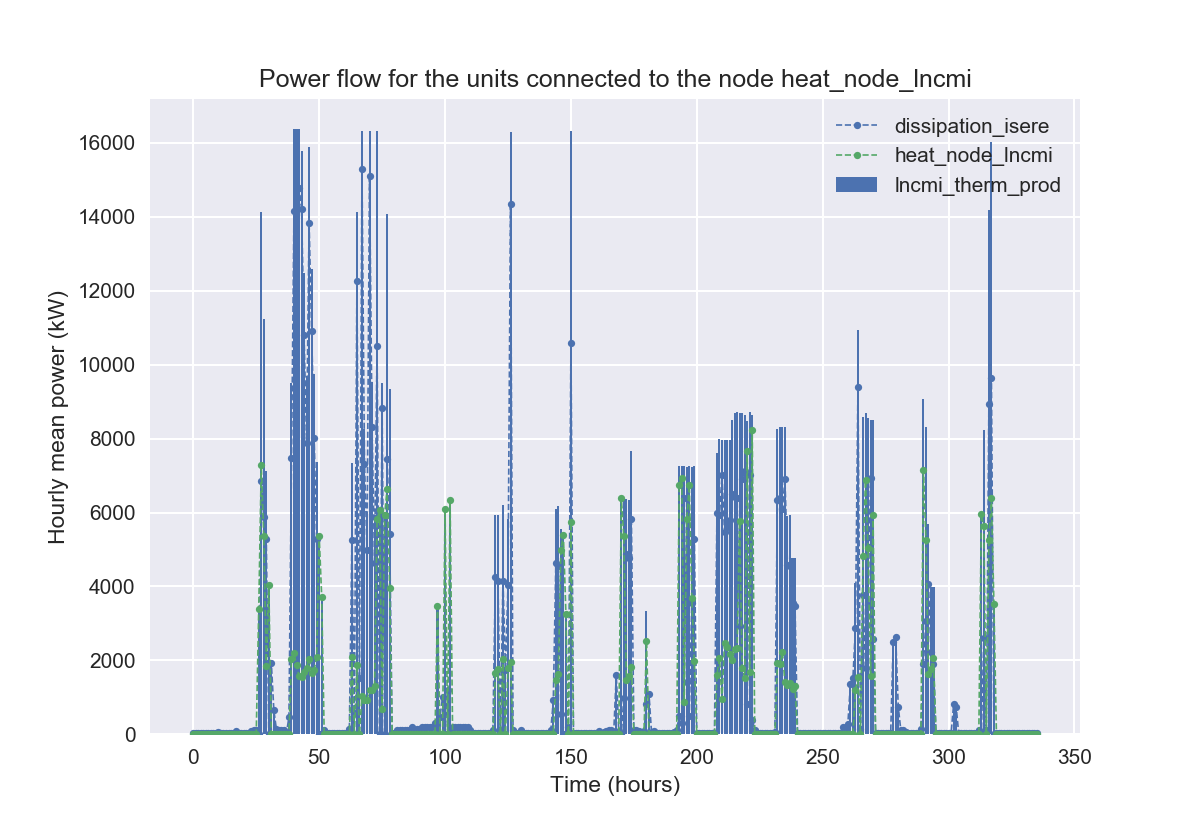


Preparing to plot the energetic flows through the node heat_node_lncmi.
	Add power from lncmi_therm_prod.
	Add power from dissipation_isere.
	Add power from heat_node_lncmi.


<IPython.core.display.Javascript object>


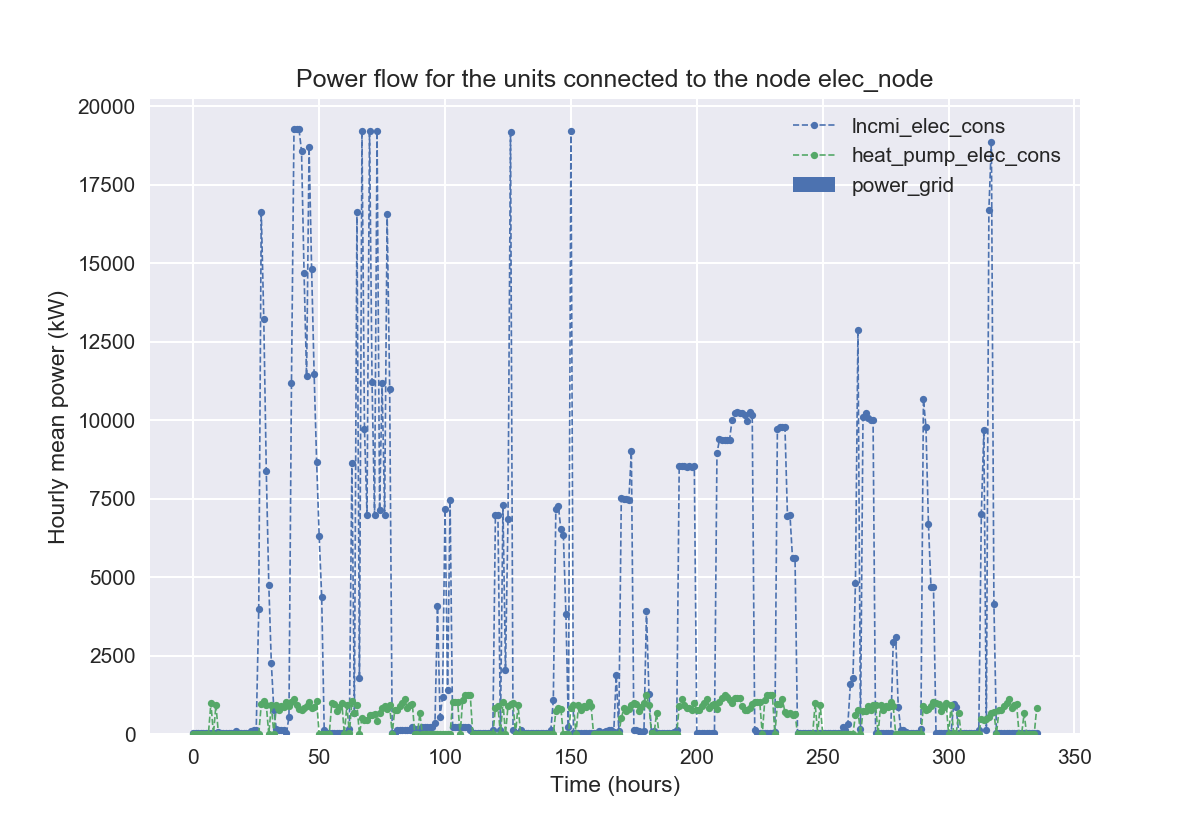


Preparing to plot the energetic flows through the node elec_node.
	Add power from lncmi_elec_cons.
	Add power from heat_pump_elec_cons.
	Add power from power_grid.


<IPython.core.display.Javascript object>


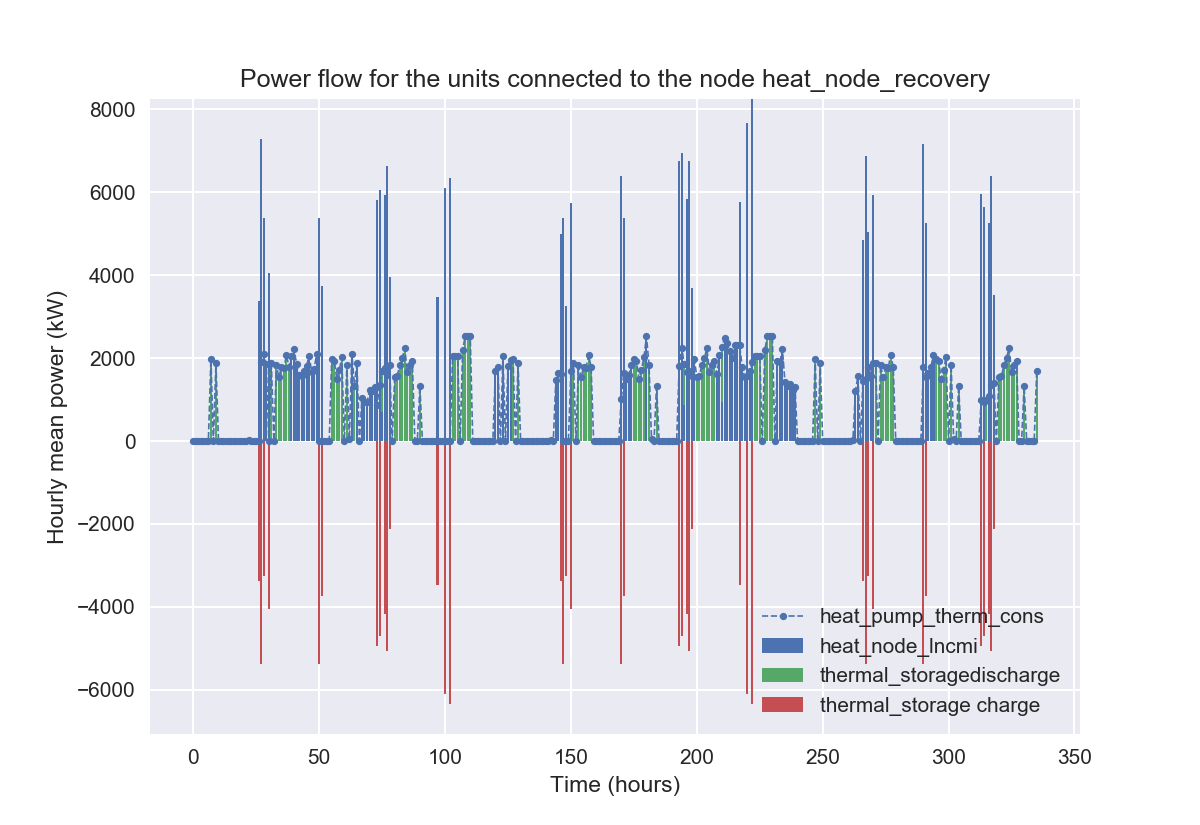


Preparing to plot the energetic flows through the node heat_node_recovery.
	Add power from heat_node_lncmi.
	Add power from thermal_storage.
	Add power from heat_pump_therm_cons.


<IPython.core.display.Javascript object>


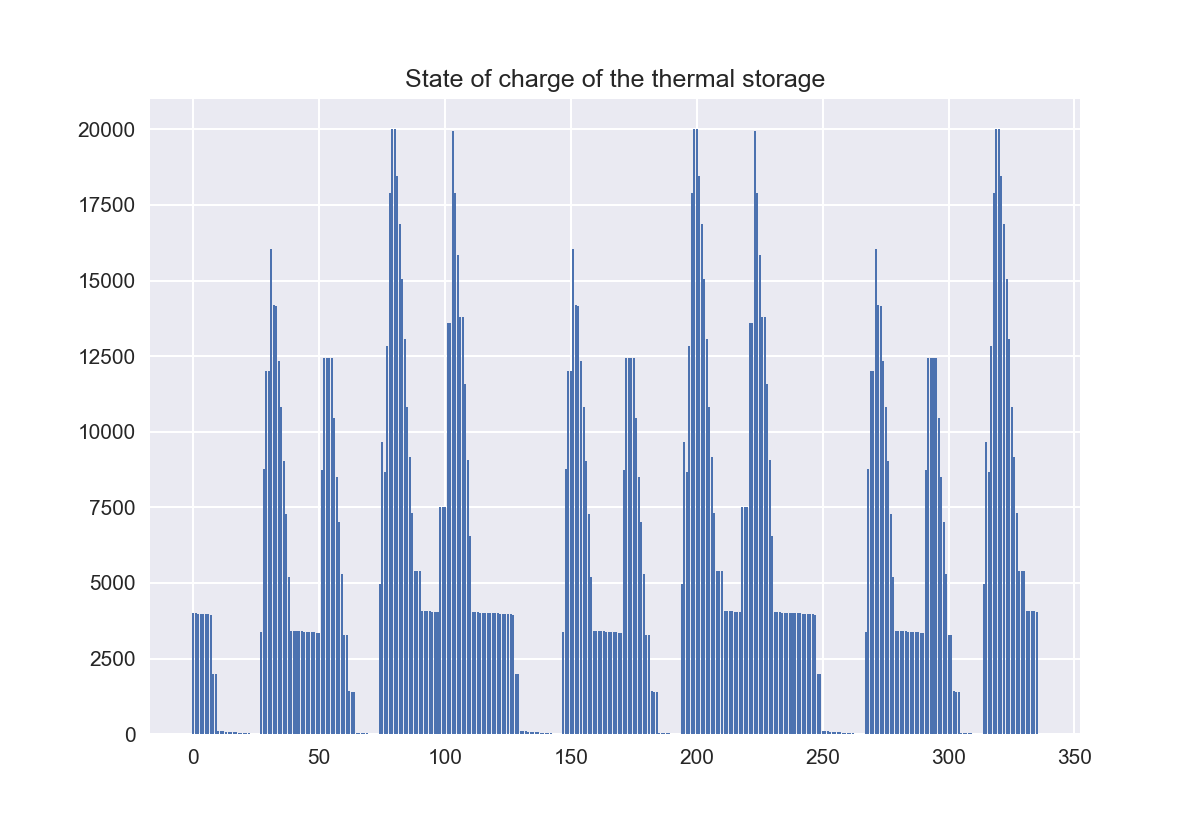

<IPython.core.display.Javascript object>


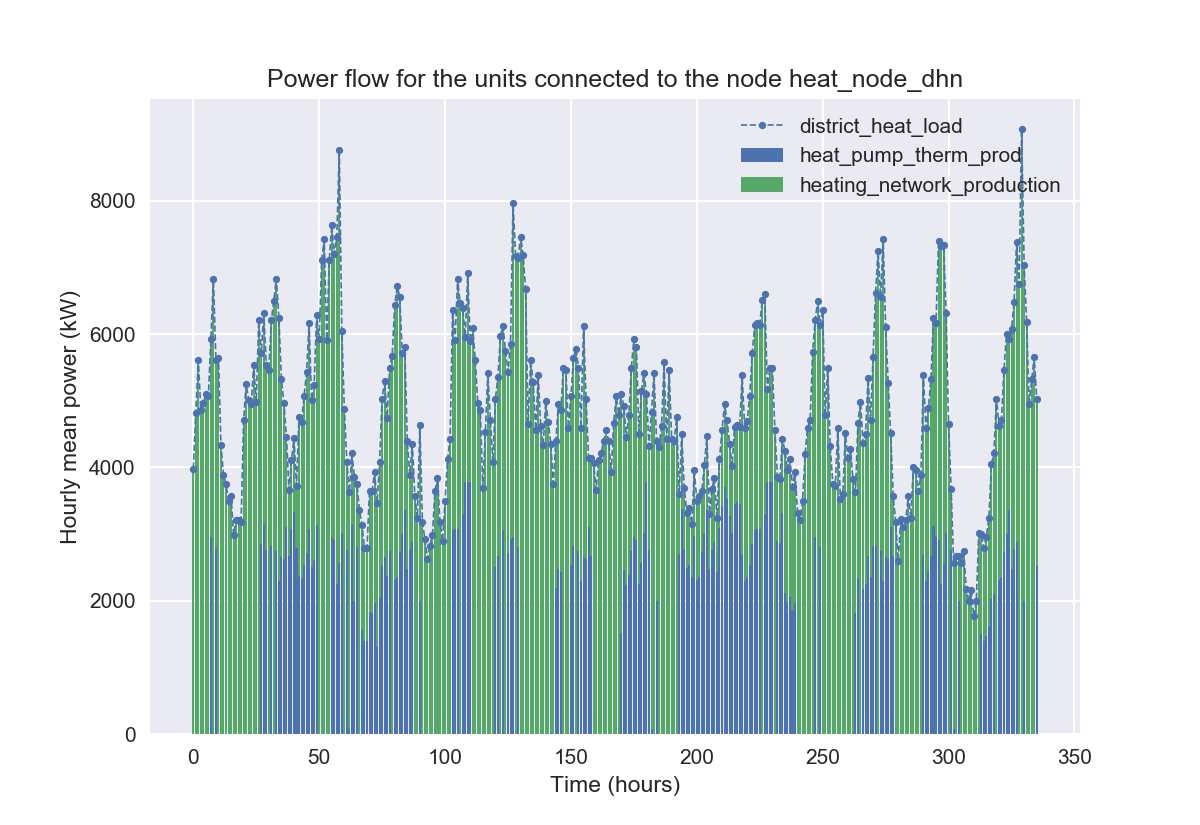


Preparing to plot the energetic flows through the node heat_node_dhn.
	Add power from heat_pump_therm_prod.
	Add power from heating_network_production.
	Add power from district_heat_load.


<IPython.core.display.Javascript object>


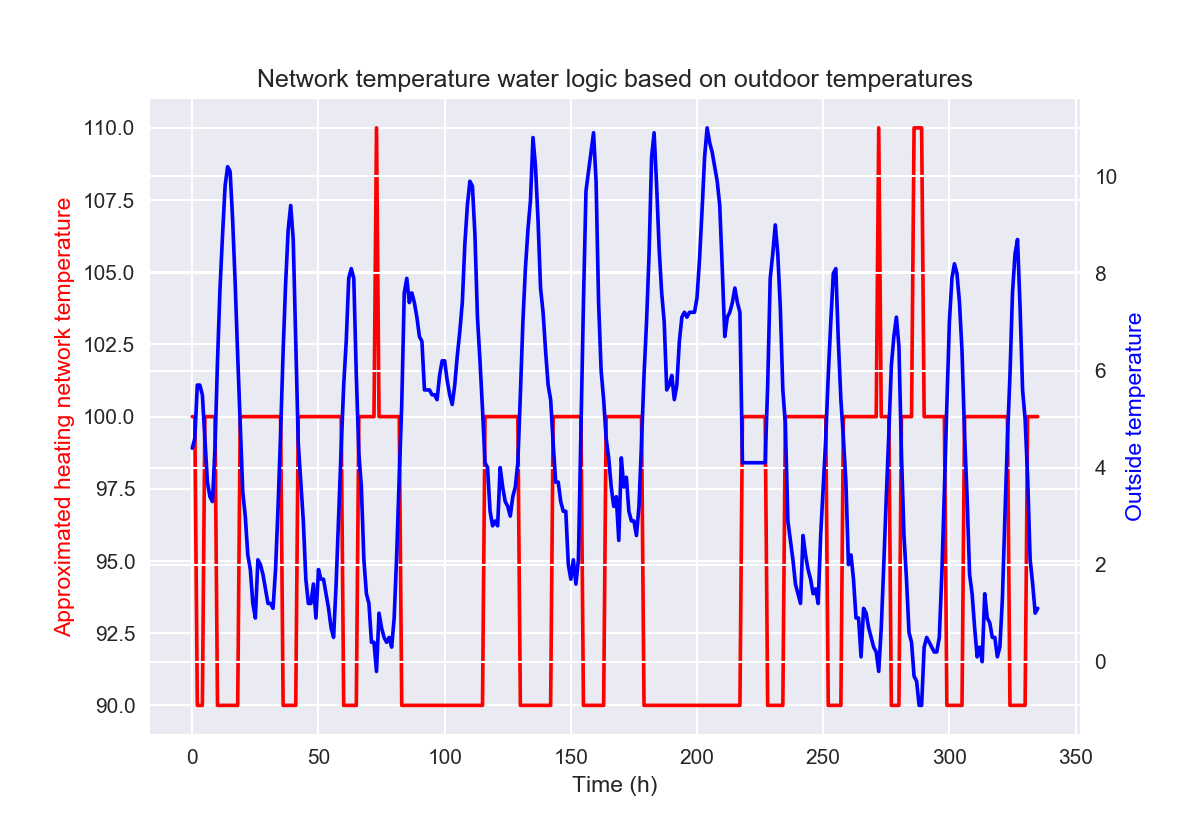

Box(children=(Box(children=(HTML(value='Here you update the inputs. Then, press <b>Update</b> to run the optim…

In [1]:
%matplotlib notebook
from python_scripts.NB_LNCMI import lncmi_case, lncmi_results, \
    dashboard
dashboard()

